# K-means clustering 
Performing k-means on PROSTITUTION data

In [2]:
import csv

focusCrimes = ['PROSTITUTION']
data = []
with open(r'SFPD_Incidents.csv','rb') as f:
    for row in csv.reader(f):
        if row[1] in focusCrimes:
            data.append({'Category' : row[1],
                         'Lat' : row[10],
                         'Lon' : row[9]})


In [3]:
import numpy as np

Lat = [float(x['Lat']) for x in data]
Lon = [float(x['Lon']) for x in data]

X = np.column_stack((Lat,Lon))
X = np.array([x for x in X if x[0] < 70])

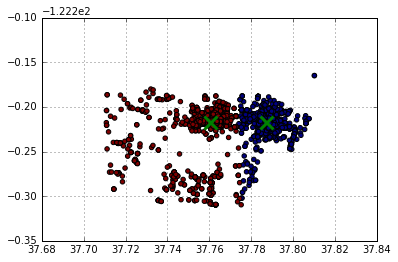

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

N = 2 # Number of clusters
km = KMeans(n_clusters = N)
y_pred = km.fit_predict(X)
centroids = km.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='g', zorder=10)
plt.grid()
plt.show()



## Create Data 
Using the above approach the dataset is created for different number of clusters

In [5]:
N = [2,3,4,5,6] # Number of clusters
l = len(X) # length of dataset
y_pred = np.zeros((l,1)) # initialize y_pred

for ii in N:
    km = KMeans(n_clusters = ii)
    temp = km.fit_predict(X).reshape(l,1)
    y_pred = np.c_[y_pred, temp] 
    
y_pred = np.delete(y_pred,np.s_[0],axis=1) # delete initial row of zeros  

KMeansData = np.c_[X , y_pred]



## Alternative way with dict


In [6]:
km_data = []
for ii in range(l):
    temp = {
        'lat' : X[ii,0],
        'lon' : X[ii,1],
        'labelK2' : int(y_pred[ii,0]),
        'labelK3' : int(y_pred[ii,1]),
        'labelK4' : int(y_pred[ii,2]),
        'labelK5' : int(y_pred[ii,3]),
        'labelK6' : int(y_pred[ii,4])
    }
    km_data.append(temp.copy())

keys = km_data[0].keys()



## Export the stuff as CSV

In [8]:
np.savetxt("KMeansData.csv", KMeansData, delimiter=",") # method 1


In [8]:
with open('km_data.csv', 'wb') as output_file: # method 2
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(km_data)